# US visa application analysis

## Section 1 -- Data cleaning

In [2]:
# read the csv file using pandas
import pandas as pd
import numpy as np
data = pd.read_csv("/Users/marjan/Desktop/us_perm_visas.csv")

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# original data size
# rows: 374362
# columns: 154
data.shape

(374362, 154)

# Data cleaning for ratio of acceptance in different countries:
Since in some countries, there is a small number of visa applicants, it does not give us an informative data,so we need to set a threshold and disregard cases with small amount of applicants, while cleaning the data.

In [4]:
#First clean the data based on column of 'country_of_citizenship'.
#We set the threshold to countries with 3000 applicants or more.
#There are 10 countries we'll work in clean_data

data_clean=data[['country_of_citizenship','case_status']] #here we just needs columns containing country of citizenship and their status.
data_clean=data_clean.dropna(subset=['country_of_citizenship','case_status']) #clean data from Nan vaiables.

data_clean['country_of_citizenship'].tolist()
top_countries=data_clean.country_of_citizenship.value_counts() #choose top 10 countries
list_top_countries=top_countries.index.values.tolist()[:10]

data_clean['country_of_citizenship']=data_clean['country_of_citizenship'].where(data_clean['country_of_citizenship'].isin(list_top_countries))
data_clean=data_clean.dropna(subset=['country_of_citizenship'])

data_clean


,country_of_citizenship,case_status
20578,INDIA,Certified
20579,PHILIPPINES,Certified
20580,INDIA,Certified-Expired
20581,INDIA,Certified
20582,INDIA,Certified
20583,INDIA,Certified-Expired
20585,INDIA,Certified-Expired
20586,SOUTH KOREA,Certified-Expired
20587,INDIA,Certified-Expired
20588,PHILIPPINES,Certified-Expired


# Find Ratio of accepted and denied visas for individual countries.

In [5]:
total_ratio=[] 
for i in range(len((data_clean.country_of_citizenship.value_counts()))):
    data=np.array([data_clean.country_of_citizenship.value_counts().index[i],(data_clean[np.logical_and(data_clean['country_of_citizenship']==data_clean.country_of_citizenship.value_counts().index[i],data_clean['case_status']=='Certified')].shape[0]/float(data_clean.country_of_citizenship.value_counts()[i]))*100,(data_clean[np.logical_and(data_clean['country_of_citizenship']==data_clean.country_of_citizenship.value_counts().index[i],data_clean['case_status']=='Denied')].shape[0]/float(data_clean.country_of_citizenship.value_counts()[i]))*100])
    total_ratio.append(data)
    
total_ratio = np.array(total_ratio)
total_ratio

array([['INDIA', '49.1647440278', '4.39132423142'],
       ['CHINA', '50.4233471447', '5.35759322645'],
       ['SOUTH KOREA', '45.032607775', '10.0872363852'],
       ['CANADA', '46.9076655052', '5.84349593496'],
       ['MEXICO', '39.2201834862', '21.45098986'],
       ['PHILIPPINES', '40.3399720918', '17.2650006343'],
       ['UNITED KINGDOM', '47.2903225806', '7.74193548387'],
       ['TAIWAN', '47.6288131248', '5.7677518585'],
       ['PAKISTAN', '47.9891304348', '8.36956521739'],
       ['FRANCE', '49.0333333333', '5.2']], dtype='|S14')

# Create data frame:
Make a data frame with 3 columns of top 10 counties with accepted and denied visa ratio.

In [6]:
import pandas as pd
df = pd.DataFrame(total_ratio,columns=['country','accepted_ratio','denied_ratio'])

Sort ratio in descending order.

In [7]:
df['accepted_ratio'] = pd.to_numeric(df['accepted_ratio'], errors = "coerce")
df['denied_ratio'] = pd.to_numeric(df['denied_ratio'], errors = "coerce")
#df = df.sort_values(by=["accepted_ratio"], ascending=False)
#df = df.sort_values(by=["denied_ratio"], ascending=False)

In [8]:
df

,country,accepted_ratio,denied_ratio
0,INDIA,49.164744,4.391324
1,CHINA,50.423347,5.357593
2,SOUTH KOREA,45.032608,10.087236
3,CANADA,46.907666,5.843496
4,MEXICO,39.220183,21.450990
5,PHILIPPINES,40.339972,17.265001
6,UNITED KINGDOM,47.290323,7.741935
7,TAIWAN,47.628813,5.767752
8,PAKISTAN,47.989130,8.369565
9,FRANCE,49.033333,5.200000


# Plotting data:

Text(0,0.5,u'denied_ratio')

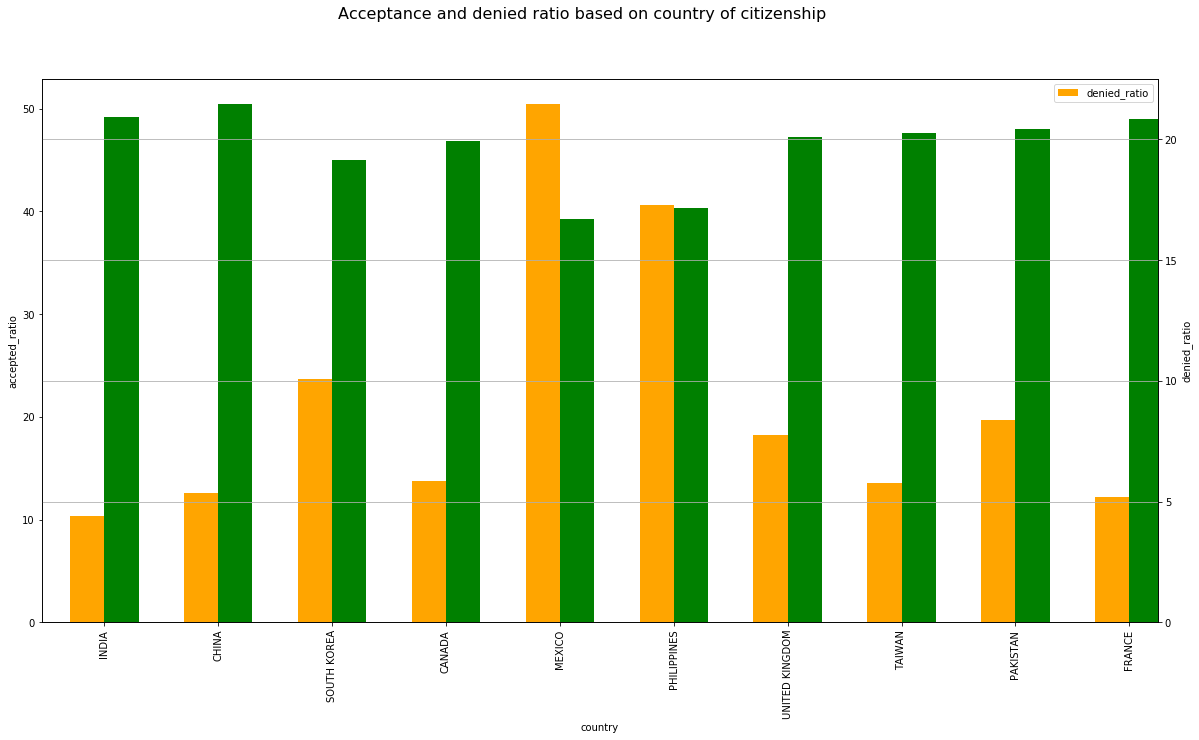

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#df = df.set_index('country')
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df.accepted_ratio.plot(kind='bar',color='green',ax=ax,width=width, position=0,legend=False)

plt.legend(loc='best')
df.denied_ratio.plot(kind='bar',color='orange', ax=ax2,width = width,position=1,legend=False)
plt.legend(loc='best')
ax.grid(None, axis=1)
ax2.grid(None)

plt.suptitle('Acceptance and denied ratio based on country of citizenship',size=16)

ax.set_ylabel('accepted_ratio')
ax2.set_ylabel('denied_ratio')